In [1]:
import matplotlib.pyplot as plt

from plot_utils import *

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma


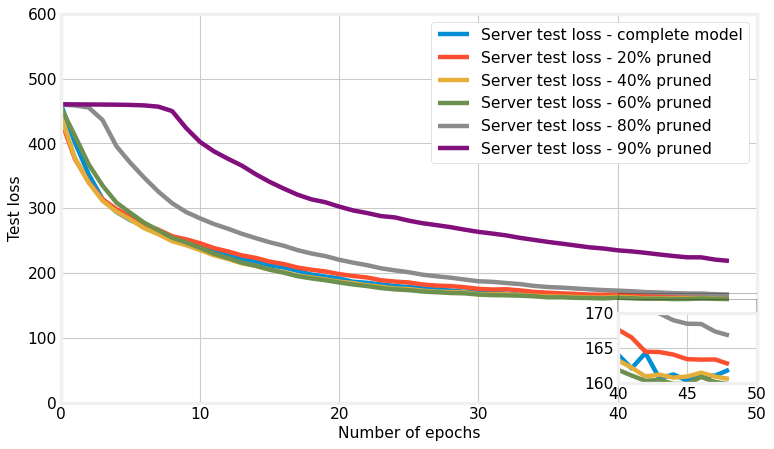

In [3]:
start_path = "MSI_rep/reports"
list_exp = [2,3,4,6,13]

fig, ax = plt.subplots(figsize = (10, 6), dpi = 80)
# [x0, y0, width, height] Lower-left corner of inset Axes, and its width and height.
axins = ax.inset_axes([0.8, 0.05, 0.2, 0.18])
c = 0

for exp in list_exp:
    path = start_path+str(exp)
    with open(f'{path}/settings.txt', 'r') as file_dict:
        settings = file_dict.read().replace('\n', '')
        settings = ast.literal_eval(settings)
        p_prun = settings["percentage_to_prune"]
    overall_df = get_all_data_ue_edge(path)
    server_loss, server_acc = get_server_loss_acc(overall_df)
    mean_client_loss, mean_client_acc = get_mean_clients_loss_acc(overall_df)

    # plt.plot(mean_client_acc, '*', label=f"Clients mean test loss - {p_prun}", color=pltcolor(c))
    # c += 1
    if c == 0:
        ax.plot(server_loss[:49], label=f"Server test loss - complete model", color=pltcolor(c))
        axins.plot(server_loss[:49], label=f"Server test loss - complete model", color=pltcolor(c))
        c += 1

    ax.plot(server_loss[50:99].values, label=f"Server test loss - {int(p_prun*100)}% pruned", color=pltcolor(c))
    axins.plot(server_loss[50:99].values, label=f"Server test loss - {int(p_prun*100)}% pruned", color=pltcolor(c))
    c += 1

plt.ylabel("Test loss")
plt.xlabel("Number of epochs")
plt.xlim(0,50)
plt.ylim(0)
plt.legend()
# sub region of the original image
x1, x2, y1, y2 = 40, 50, 160, 170
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig("figures/loss_perc.png", bbox_inches = "tight")
plt.show()

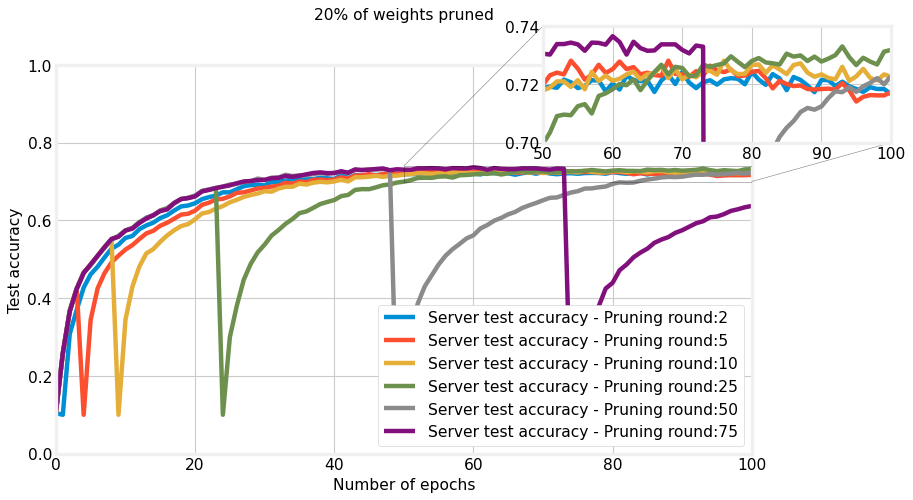

In [4]:
start_path = "MSI_rep/reports"
list_exp = [4,7,8,9,10]
list_exp = [12,10,9,7,4,8]
list_exp = [16,17,18,19,2,20]
fig, ax = plt.subplots(figsize = (10, 6), dpi = 80)
# [x0, y0, width, height] Lower-left corner of inset Axes, and its width and height.
axins = ax.inset_axes([0.7, 0.8, 0.5, 0.3])
c = 0

for exp in list_exp:
    path = start_path+str(exp)
    with open(f'{path}/settings.txt', 'r') as file_dict:
        settings = file_dict.read().replace('\n', '')
        settings = ast.literal_eval(settings)
        r_prun = settings["round_pruning"]
    overall_df = get_all_data_ue_edge(path)
    server_loss, server_acc = get_server_loss_acc(overall_df)
    mean_client_loss, mean_client_acc = get_mean_clients_loss_acc(overall_df)

    # plt.plot(mean_client_acc, '*', label=f"Clients mean test loss - {p_prun}", color=pltcolor(c))
    # c += 1
    ax.plot(server_acc, label=f"Server test accuracy - Pruning round:{r_prun}", color=pltcolor(c))
    axins.plot(server_acc, label=f"Server test accuracy - Pruning round:{r_prun}", color=pltcolor(c))
    c += 1

plt.ylabel("Test accuracy")
plt.xlabel("Number of epochs")
plt.xlim(0,100)
plt.ylim(0)
plt.legend()
# sub region of the original image
x1, x2, y1, y2 = 50, 100, 0.7, 0.74
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.title(f"{int(settings['percentage_to_prune']*100)}% of weights pruned")
plt.savefig("figures/accuracy_round_20.png", bbox_inches = "tight")
plt.show()

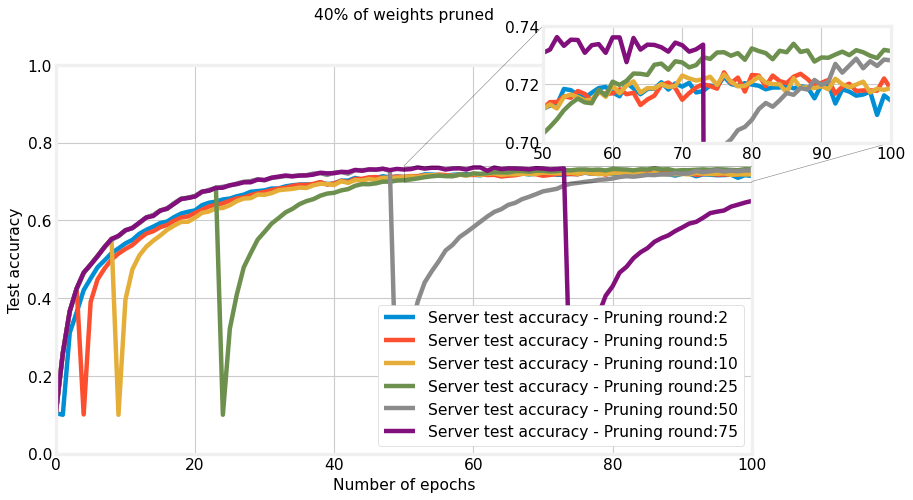

In [5]:
start_path = "MSI_rep/reports"

list_exp = [25,24,23,22,3, 21]
fig, ax = plt.subplots(figsize = (10, 6), dpi = 80)
# [x0, y0, width, height] Lower-left corner of inset Axes, and its width and height.
axins = ax.inset_axes([0.7, 0.8, 0.5, 0.3])
c = 0

for exp in list_exp:
    path = start_path+str(exp)
    with open(f'{path}/settings.txt', 'r') as file_dict:
        settings = file_dict.read().replace('\n', '')
        settings = ast.literal_eval(settings)
        r_prun = settings["round_pruning"]
    overall_df = get_all_data_ue_edge(path)
    server_loss, server_acc = get_server_loss_acc(overall_df)
    mean_client_loss, mean_client_acc = get_mean_clients_loss_acc(overall_df)

    # plt.plot(mean_client_acc, '*', label=f"Clients mean test loss - {p_prun}", color=pltcolor(c))
    # c += 1
    ax.plot(server_acc, label=f"Server test accuracy - Pruning round:{r_prun}", color=pltcolor(c))
    axins.plot(server_acc, label=f"Server test accuracy - Pruning round:{r_prun}", color=pltcolor(c))
    c += 1

plt.ylabel("Test accuracy")
plt.xlabel("Number of epochs")
plt.xlim(0,100)
plt.ylim(0)
plt.legend()
# sub region of the original image
x1, x2, y1, y2 = 50, 100, 0.7, 0.74
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.title(f"{int(settings['percentage_to_prune']*100)}% of weights pruned")
plt.savefig("figures/accuracy_round_40.png", bbox_inches = "tight")
plt.show()

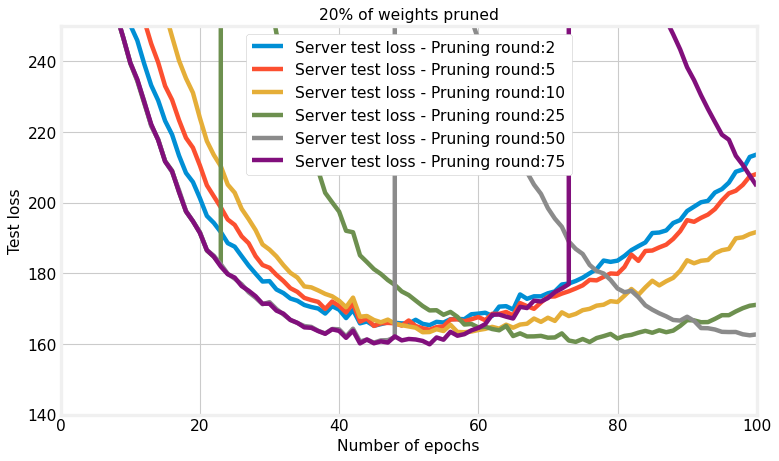

In [6]:
start_path = "MSI_rep/reports"
list_exp = [4,7,8,9,10]
list_exp = [12,10,9,7,4,8]
list_exp = [25,24,23,22,3, 21]
list_exp = [16,17,18,19,2,20]

fig, ax = plt.subplots(figsize = (10, 6), dpi = 80)
# [x0, y0, width, height] Lower-left corner of inset Axes, and its width and height.
#axins = ax.inset_axes([0.7, 0.8, 0.5, 0.3])
c = 0

for exp in list_exp:
    path = start_path+str(exp)
    with open(f'{path}/settings.txt', 'r') as file_dict:
        settings = file_dict.read().replace('\n', '')
        settings = ast.literal_eval(settings)
        r_prun = settings["round_pruning"]
    overall_df = get_all_data_ue_edge(path)
    server_loss, server_acc = get_server_loss_acc(overall_df)
    mean_client_loss, mean_client_acc = get_mean_clients_loss_acc(overall_df)

    # plt.plot(mean_client_acc, '*', label=f"Clients mean test loss - {p_prun}", color=pltcolor(c))
    # c += 1
    ax.plot(server_loss, label=f"Server test loss - Pruning round:{r_prun}", color=pltcolor(c))
    #axins.plot(server_loss, label=f"Server test loss - Pruning round:{r_prun}", color=pltcolor(c))
    c += 1

plt.ylabel("Test loss")
plt.xlabel("Number of epochs")
plt.xlim(0,100)
plt.ylim(0)
plt.legend()
# sub region of the original image
x1, x2, y1, y2 = 50, 100, 0.7, 0.74
plt.ylim(140,250)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#ax.indicate_inset_zoom(axins, edgecolor="black")

plt.title(f"{int(settings['percentage_to_prune']*100)}% of weights pruned")
plt.savefig("figures/loss_round_20.png", bbox_inches = "tight")
plt.show()

# CPU TIME

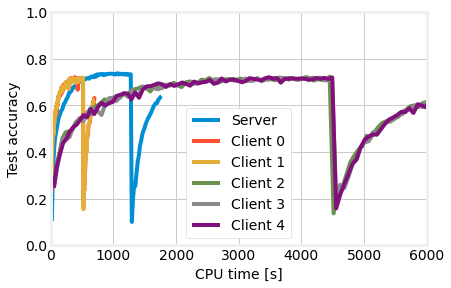

In [14]:
path = "MSI_rep/reports8/"

s = pd.read_csv(path+f"server.csv")
cpu_time = s[s["operation"]=="evaluate"]
cpu_time = cpu_time[cpu_time["phase"]=="end"].p
cpu_time = cpu_time/1e9

acc = s.train_acc.dropna()
plt.plot(cpu_time,acc, label = f"Server")


for i in range(5):
    c = pd.read_csv(path+f"client_{i}.csv")
    cpu_time = c[c["operation"]=="send_fit_ins"]
    cpu_time = cpu_time[cpu_time["phase"]=="end"].p
    cpu_time = cpu_time/1e9

    min_time = c.t.min()
    time = c[c["operation"]=="send_fit_ins"]
    time = (time[time["phase"]=="end"].t-min_time)/1e9

    acc = c.train_acc.dropna()

    plt.plot(cpu_time,acc, label = f"Client {i}")

plt.legend()
plt.xlim(0,6000)
plt.xlabel("CPU time [s]")
plt.ylabel("Test accuracy")
plt.ylim(0)

plt.savefig("figures/cpu_time.png", bbox_inches = "tight")


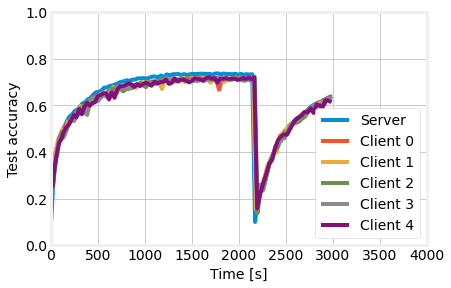

In [15]:
path = "MSI_rep/reports8/"


s = pd.read_csv(path+f"server.csv")

min_time = s.t.min()
time = s[s["operation"]=="evaluate"]
time = (time[time["phase"]=="end"].t-min_time)/1e9

acc = s.train_acc.dropna()
plt.plot(time,acc, label = f"Server")

for i in range(5):
    c = pd.read_csv(path+f"client_{i}.csv")


    min_time = c.t.min()
    time = c[c["operation"]=="send_fit_ins"]
    time = (time[time["phase"]=="end"].t-min_time)/1e9

    acc = c.train_acc.dropna()

    plt.plot(time,acc, label = f"Client {i}")

plt.legend()
plt.xlim(0,4000)
plt.xlabel("Time [s]")
plt.ylabel("Test accuracy")
plt.ylim(0)
plt.savefig("figures/gpu_time.png", bbox_inches = "tight")

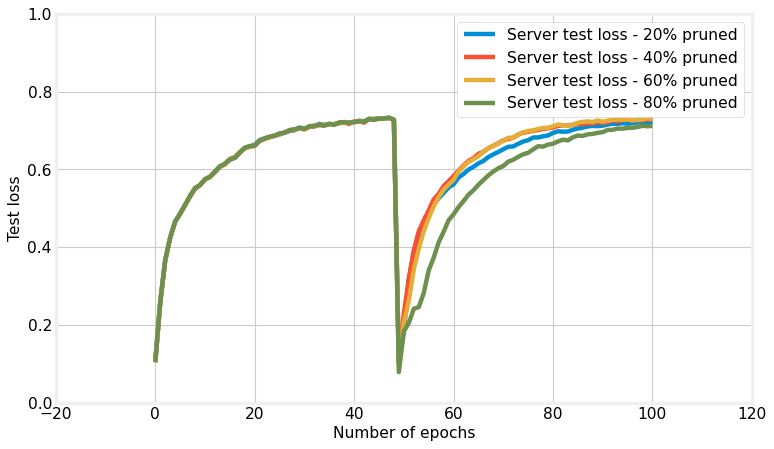

In [8]:
start_path = "MSI_rep/reports"
list_exp = [2,3,4,6]

fig, ax = plt.subplots(figsize = (10, 6), dpi = 80)
# [x0, y0, width, height] Lower-left corner of inset Axes, and its width and height.
# axins = ax.inset_axes([0.9, 0.95, 0.7, 0.75])
c = 0

for exp in list_exp:
    path = start_path+str(exp)
    with open(f'{path}/settings.txt', 'r') as file_dict:
        settings = file_dict.read().replace('\n', '')
        settings = ast.literal_eval(settings)
        p_prun = settings["percentage_to_prune"]

    overall_df = get_all_data_ue_edge(path)
    _, server_acc = get_server_loss_acc(overall_df)
    cpu_time_server = get_server_metric(overall_df, 'p')

    for i in range(5):
        cpu_time_server += get_client_metric(overall_df,i,'p')

    ax.plot(server_acc.values, label=f"Server test loss - {int(p_prun*100)}% pruned", color=pltcolor(c))
    # axins.plot(server_acc.values, label=f"Server test loss - {int(p_prun*100)}% pruned", color=pltcolor(c))
    c += 1

plt.ylabel("Test loss")
plt.xlabel("Number of epochs")

plt.ylim(0,1)
plt.legend()
# sub region of the original image
x1, x2, y1, y2 = 80, 100, 0.65, 0.75
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig("figures/time_acc_perc.png")
plt.show()

In [4]:
cpu_time_server

0        16.769357
1        30.721686
2        45.008307
3        59.329437
4        73.711288
          ...     
96     1461.184481
97     1476.038085
98     1490.843099
99     1505.442655
100    1522.374759
Name: p, Length: 101, dtype: float64